<a href="https://colab.research.google.com/github/AnaghaWani/BESem8/blob/main/DL/dl2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
df = pd.read_csv('/content/drive/My Drive/IMDB_Dataset.csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [26]:
df.shape

(50000, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [28]:
df.duplicated().sum()

np.int64(418)

In [29]:
df.drop_duplicates(inplace=True)

In [30]:
df.shape

(49582, 2)

In [31]:
df['review'] = df['review'].str.replace('<br /><br />','') #cleaning up html formatting

In [32]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [33]:
from sklearn.preprocessing import LabelEncoder #assign 1-positive and 0-negative
en = LabelEncoder()

In [34]:
df['sentiment'] = en.fit_transform(df['sentiment'])

In [35]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. The filming tec...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [36]:
# import nltk
# nltk.download('stopwords')

from nltk.corpus import stopwords
st_words = stopwords.words('english')

In [37]:
import string
punc = string.punctuation

In [38]:
import nltk

In [39]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [67]:
import pandas as pd
from tqdm import tqdm

tqdm.pandas()
def trans_msg_batch(msg_list):
    results = []
    for txt in msg_list:
        txt = txt.lower()
        txt = nltk.word_tokenize(txt)

        l1 = [i for i in txt if i.isalpha()]
        l2 = [i for i in l1 if (i not in st_words and i not in punc)]
        l3 = [ps.stem(i) for i in l2]

        results.append(" ".join(l3))
    return results

def batch_process(df_col, batch_size=1000):
    results = []
    for i in tqdm(range(0, len(df_col), batch_size)):
        batch = df_col.iloc[i:i+batch_size].tolist()
        processed_batch = trans_msg_batch(batch)
        results.extend(processed_batch)
    return results

# 🚀 Apply batched + progress
df['review'] = batch_process(df['review'], batch_size=1000)


100%|██████████| 50/50 [02:23<00:00,  2.87s/it]


In [49]:
df

,review,sentiment
0,one review mention watch oz episod hook right ...,1
1,wonder littl product film techniqu fashion giv...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job creativ origin fir...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,go disagre previou comment side maltin one sec...,0


In [50]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1000)

In [51]:
x = cv.fit_transform(df['review']).toarray()

In [52]:
y = df['sentiment']

In [53]:
x.shape

(49582, 1000)

In [54]:
y.shape

(49582,)

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [56]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [57]:
model = Sequential()

model.add(Dense(128,activation='relu',input_shape=(1000,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(28,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [58]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       128,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 28)             │         1,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            29 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,233 (539.97 KB)

 Trainable params: 138,233 (539.97 KB)

 Non-trainable params: 0 (0.00 B)

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [60]:
model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8084 - loss: 0.4293 - val_accuracy: 0.8650 - val_loss: 0.3264
Epoch 2/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8805 - loss: 0.2817 - val_accuracy: 0.8494 - val_loss: 0.3459
Epoch 3/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9221 - loss: 0.1981 - val_accuracy: 0.8528 - val_loss: 0.3747
Epoch 4/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9633 - loss: 0.1034 - val_accuracy: 0.8463 - val_loss: 0.5351
Epoch 5/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9832 - loss: 0.0513 - val_accuracy: 0.8467 - val_loss: 0.6976
Epoch 6/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9905 - loss: 0.0286 - val_accuracy: 0.8451 - val_loss: 0.6992
Epoch 7/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9913 - loss: 0.0286 - val_accuracy: 0.8428 - val_loss: 0.8311
Epoch 8/50
992/992 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9940 - loss: 0.0190 - val_accuracy: 0.

In [61]:
pred = (model.predict(x_test) > 0.5).astype(int)
# Predict and convert to binary (0 or 1)

310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.8415851568014521

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      5033
           1       0.84      0.83      0.84      4884

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



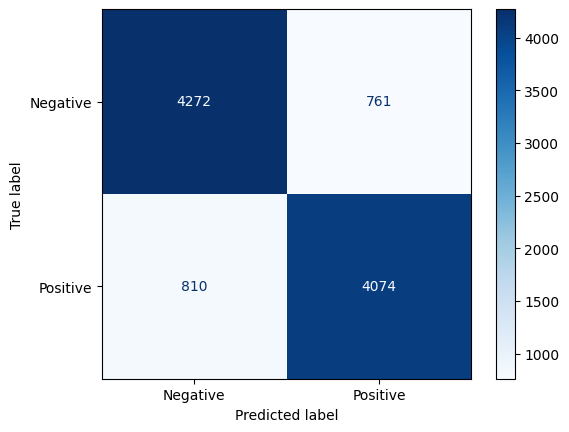

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")